In [178]:
###############################################
# Author: Pedro Igor Salvador Alves
# Project: Titanic Survival Prediction
# Start Date: 30/12/2021
# Type: Data Science - Machine Learning 
###############################################

In [228]:
#importing libraries for data analysis and visualization
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [229]:
#reading data
train = pd.read_csv("data/train.csv")
test = pd.read_csv("data/test.csv")

In [230]:
#further information about the data
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [231]:
#searching for missing values
train.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [232]:
#we have some mssing values, let's treat them before verifying patterns
#for cabin, I think it's better dropping this attribute. Seeing a description of this attribute, we can see that it will be hard to make it categorical later

train['Cabin'].describe()
train = train.drop(['Cabin'], axis=1)
test = test.drop(['Cabin'], axis=1)

In [233]:
#let's do the same with ticket
train['Ticket'].describe()
train = train.drop(['Ticket'], axis=1)
test = test.drop(['Ticket'], axis=1)

In [234]:
#the same with name
train['Name'].describe()
train = train.drop(['Name'], axis=1)
test = test.drop(['Name'], axis=1)

In [235]:
#for age, we are going to take the mean and the standard deviation to fill the missing values 
st_d = train["Age"].std()
mean = train["Age"].mean()

#generate the number of missing ages random int numbers
random = np.random.randint(mean - st_d, mean + st_d, size = train["Age"].isnull().sum())

age_copy = train["Age"].copy()
age_copy[np.isnan(age_copy)] = random
train["Age"] = age_copy.astype(int)

#doing the same to the test data
random = np.random.randint(mean - st_d, mean + st_d, size = test["Age"].isnull().sum())
age_copy = test["Age"].copy()
age_copy[np.isnan(age_copy)] = random
test["Age"] = age_copy.astype(int)

test["Age"].isnull().sum()
train["Age"].isnull().sum()

0

In [236]:
#for embarked, let's complete with the commom value
train['Embarked'] = train['Embarked'].fillna(train['Embarked'].mode()[0])
test['Embarked'] = test['Embarked'].fillna(test['Embarked'].mode()[0])

test['Embarked'].isnull().sum()
train['Embarked'].isnull().sum()

0

In [237]:
#searching for missing values
train.isnull().sum()

PassengerId    0
Survived       0
Pclass         0
Sex            0
Age            0
SibSp          0
Parch          0
Fare           0
Embarked       0
dtype: int64

In [238]:
#let's see our train data
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Sex          891 non-null    object 
 4   Age          891 non-null    int32  
 5   SibSp        891 non-null    int64  
 6   Parch        891 non-null    int64  
 7   Fare         891 non-null    float64
 8   Embarked     891 non-null    object 
dtypes: float64(1), int32(1), int64(5), object(2)
memory usage: 59.3+ KB


In [239]:
#converting sex to a categorical attribute
train['Sex'] = train['Sex'].map({'male': 0,'female': 1})
test['Sex'] = test['Sex'].map({'male': 0,'female': 1})

In [240]:
#converting fare to int
train['Fare'] = train['Fare'].fillna(0)
train['Fare'] = train['Fare'].astype(int)

test['Fare'] = test['Fare'].fillna(0)
test['Fare'] = test['Fare'].astype(int)

In [241]:
#converting embarked to a categorical attribute
train['Embarked'] = train['Embarked'].map({'S': 0, 'C': 1, 'Q': 2})
test['Embarked'] = test['Embarked'].map({'S': 0, 'C': 1, 'Q': 2})

In [242]:
train

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,1,0,3,0,22,1,0,7,0
1,2,1,1,1,38,1,0,71,1
2,3,1,3,1,26,0,0,7,0
3,4,1,1,1,35,1,0,53,0
4,5,0,3,0,35,0,0,8,0
...,...,...,...,...,...,...,...,...,...
886,887,0,2,0,27,0,0,13,0
887,888,1,1,1,19,0,0,30,0
888,889,0,3,1,42,1,2,23,0
889,890,1,1,0,26,0,0,30,1


In [243]:
#we have some categorical observations, so let's separate them into a diferent data frame
df_numerical = train[['Age', 'SibSp', 'Parch', 'Fare']]
df_categorical = train[["Survived", "Pclass", "Sex", "Embarked"]]

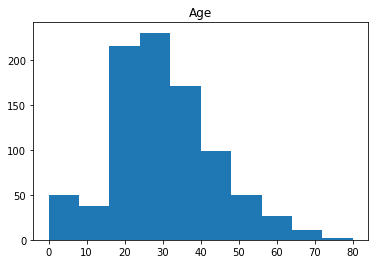

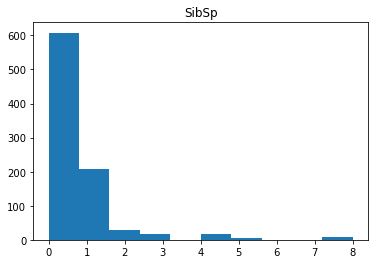

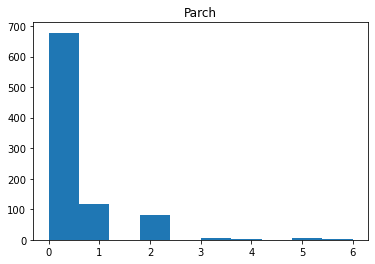

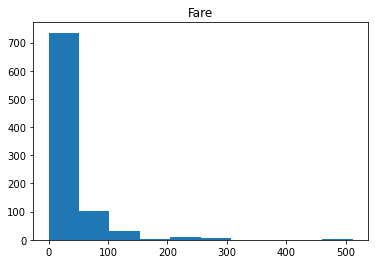

In [244]:
#for the numerical data frame, we plot a histogram to see the distribution
for column in df_numerical.columns:
    plt.hist(df_numerical[column])
    plt.title(column)
    plt.show()

<AxesSubplot:>

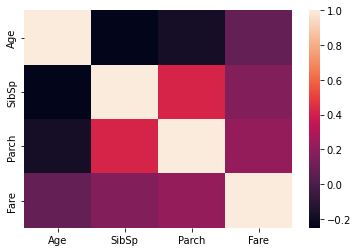

In [245]:
#except from Age, all the attributes are not normalized. Let's plot a heatmap to see the correlation among the variables
sns.heatmap(df_numerical.corr())

In [246]:
#ignoring the main diagonal, we see that SibSp and Parch have correlation. It makes sense, because it's normal that parents travel with their children and spouses travel together



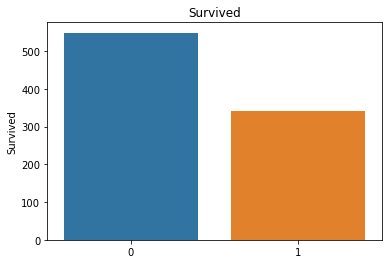

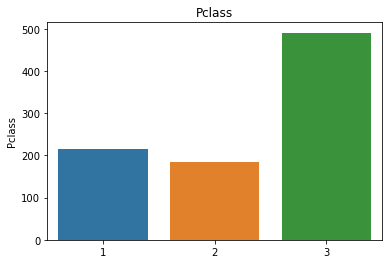

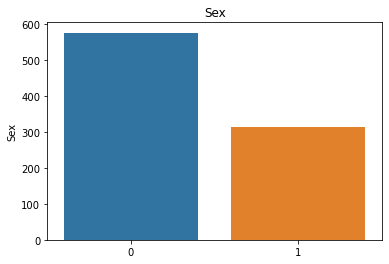

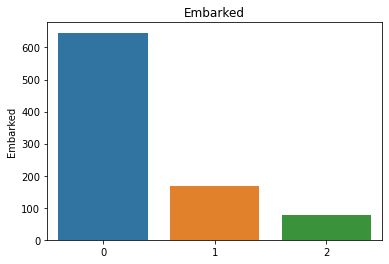

In [247]:
for column in df_categorical.columns:
    sns.barplot(x=df_categorical[column].value_counts().index, y=df_categorical[column].value_counts()).set_title(column)
    plt.show()

In [248]:
#and let's see how the numerical variables behave with the "Survived" attribute
pd.pivot_table(train, index = 'Survived', values = ['Age','SibSp','Parch','Fare'])

,Age,Fare,Parch,SibSp
Survived,,,,
0,30.260474,21.690346,0.329690,0.553734
1,28.324561,47.991228,0.464912,0.473684


In [249]:
#insights:
## 1 - young people tend to survive (average ~ 28);
## 2 - people who pay a high fare price tend to survive;

In [250]:
#building the models. I'm using two models that I'm learning now: Logistic Regression and Random Forest
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier

X_train = train.drop("Survived", axis=1)
X_train = X_train.drop("PassengerId", axis=1)
Y_train = train["Survived"]

X_test = test.drop("PassengerId", axis=1).copy()

In [251]:
#logistic regression
logreg = LogisticRegression(max_iter=200)
logreg.fit(X_train, Y_train)

Y_pred = logreg.predict(X_test)

score_logreg = round(logreg.score(X_train, Y_train) * 100, 2)

In [252]:
score_logreg

80.02

In [253]:
#Random Forest
ranfor = RandomForestClassifier(n_estimators=100)
ranfor.fit(X_train, Y_train)

Y_pred = ranfor.predict(X_test)

ranfor.score(X_train, Y_train)
score_ranfor = round(ranfor.score(X_train, Y_train) * 100, 2)

In [254]:
score_ranfor

96.75

In [255]:
importances = pd.DataFrame({'feature':X_train.columns,'importance':np.round(ranfor.feature_importances_,3)})
importances = importances.sort_values('importance',ascending=False).set_index('feature')
importances

,importance
feature,
Age,0.306
Sex,0.279
Fare,0.204
Pclass,0.085
SibSp,0.049
Parch,0.040
Embarked,0.036


In [260]:
#evaluating the Random Forest model
from sklearn.model_selection import cross_val_predict
from sklearn.metrics import confusion_matrix
predictions = cross_val_predict(ranfor, X_train, Y_train, cv=3)
confusion_matrix(Y_train, predictions)

array([[466,  83],
       [ 98, 244]], dtype=int64)

In [261]:
#we see that the model has done a good job about the true negatives and false positives
#recall
from sklearn.metrics import precision_score, recall_score

precision = precision_score(Y_train, predictions)
recall = recall_score(Y_train, predictions)

print("Precision:", precision)
print("Recall:", recall)

Precision: 0.746177370030581
Recall: 0.7134502923976608
